In [1]:
from sklearn.preprocessing import scale
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In this example we'll try to do semi-supervised learning. We are given a sample from "signal" distribution and a mixed sample from the signal and some other distribution. The goal of this exercise is to put the upper bound on the number of signal samples in the mix. 

In [2]:
signal = np.load("signal.npy")
mix = np.load("mix.npy")

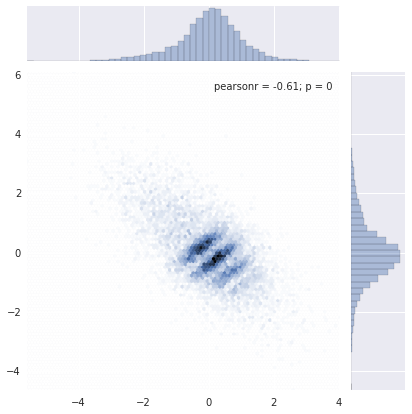

In [3]:
sns.jointplot(signal[:, 0], signal[:, 1], kind='hex')

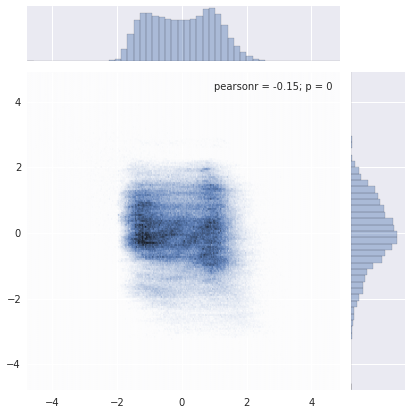

In [4]:
sns.jointplot(mix[:, 0], mix[:, 1], kind='hex')

In [5]:
from sklearn.neighbors import KernelDensity

The parameter selection for KernelDensity is tricky - for example see https://www.jstor.org/stable/4615859 . We'll limit ourselves with cross-validation by the total likelihood.  

In [21]:
from sklearn.grid_search import GridSearchCV
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(signal)

GridSearchCV(cv=None, error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'bandwidth': array([  0.1    ,   0.12743,   0.16238,   0.20691,   0.26367,   0.33598,
         0.42813,   0.54556,   0.69519,   0.88587,   1.12884,   1.43845,
         1.83298,   2.33572,   2.97635,   3.79269,   4.83293,   6.15848,
         7.8476 ,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [22]:
signal_kd = grid.best_estimator_.fit(signal)

In [23]:
signal_gen_sample = signal_kd.sample(n_samples=len(signal), random_state=234)

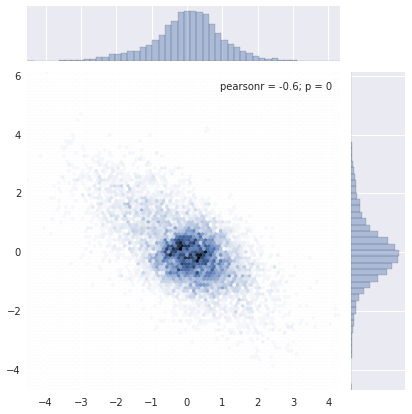

In [24]:
sns.jointplot(signal_gen_sample[:, 0], signal_gen_sample[:, 1], kind='hex')

This might take some time...

In [25]:
mix_scores = signal_kd.score_samples(mix)

In [26]:
threshold = np.log(0.1)

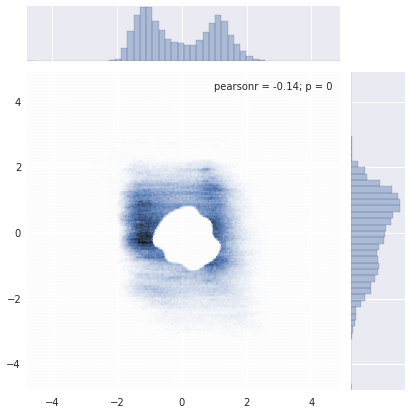

In [27]:
sns.jointplot(mix[mix_scores < threshold, 0],
              mix[mix_scores < threshold, 1], kind='hex')

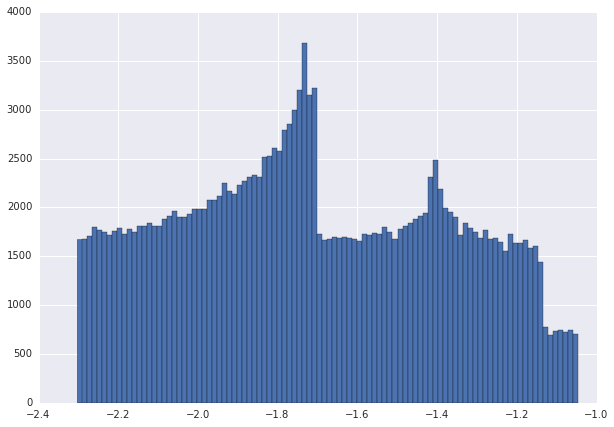

In [28]:
plt.hist(mix_scores[mix_scores > threshold], bins=100);